In [3]:
import matplotlib.pyplot as plt

In [4]:
message_size = [2**x for x in range(3,31)]
time = [0.000000334,0.000000302,0.000000357,0.000000368,0.000001869,0.000000730,0.000000697,0.000000850,0.000001304,0.000002168,0.000002308,0.000003867,0.000006645,0.000011597,0.000021917,0.000052385,0.000101434,0.000195715,0.000386430,0.000772573,0.002473117,0.005139330,0.010173410,0.020129200,0.040047738,0.080092852,0.160194404,0.320109057]
time_recv=[0.000000204,0.000000188,0.000000218,0.000000231,0.000001010,0.000000418,0.000000419,0.000000496,0.000000786,0.000001278,0.000001376,0.000002467,0.000004458,0.000008713,0.000018975,0.000029971,0.000060750,0.000114729,0.000225885,0.000445766,0.001405009,0.002996506,0.006244996,0.012518765,0.024847595,0.049516815,0.098830491,0.198193110]

**Визуализация времени работы программы к размерности программы:**

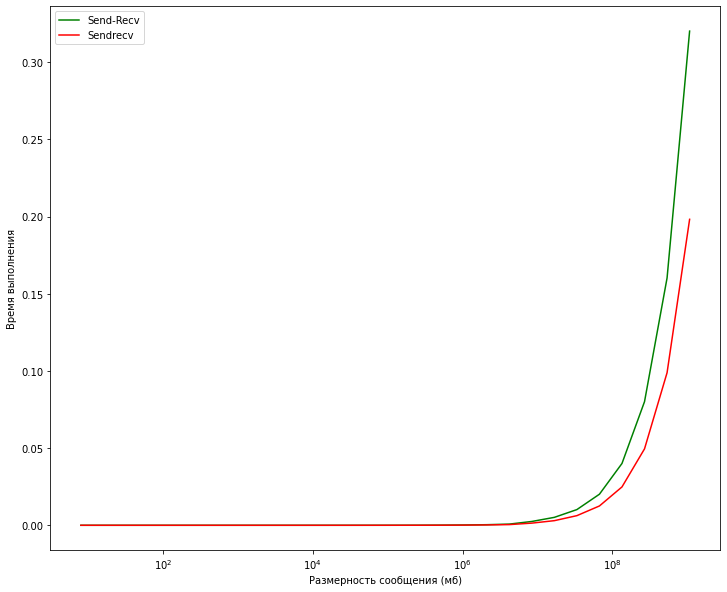

In [6]:
fig, ax1 = plt.subplots(ncols=1, figsize=(12, 10))
ax1.set_xlabel('Размерность сообщения (мб)')
ax1.set_ylabel('Время выполнения')    
    
ax1.plot(message_size, time,label='Send-Recv', color='g')
ax1.plot(message_size, time_recv,label='Sendrecv', color='r')

plt.xscale('log')
plt.yscale('linear')
ax1.legend()

Видим почти экспоненциальную зависимость. MPI_Sendrecv работает быстрее за счет внутренних оптимизаций - это очевидно

**Визуализация ускорения работы программы:**

In [16]:
speed_up_recv = [x/y if y else 1 for x,y in zip(time,time_recv)]
speed_up = [x/y if y else 1 for x,y in zip(time, time)]

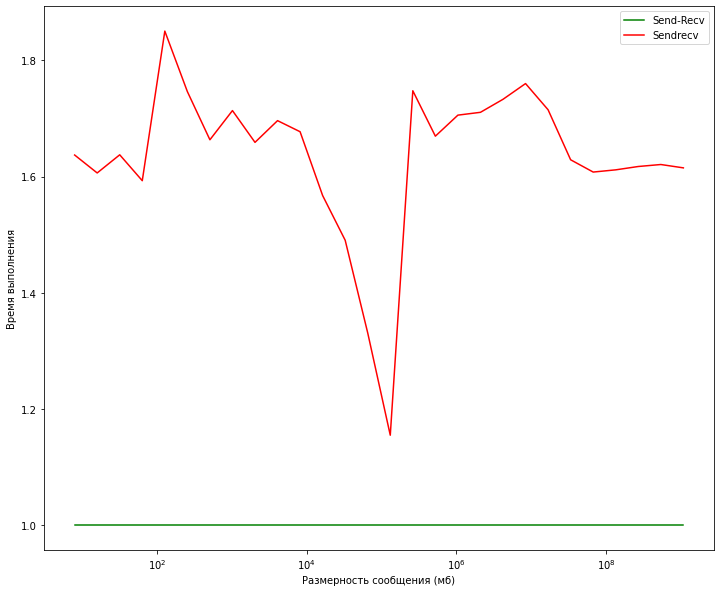

In [17]:
fig, ax1 = plt.subplots(ncols=1, figsize=(12, 10))
ax1.set_xlabel('Размерность сообщения (мб)')
ax1.set_ylabel('Время выполнения')    
    
ax1.plot(message_size, speed_up,label='Send-Recv', color='g')
ax1.plot(message_size, speed_up_recv,label='Sendrecv', color='r')

plt.xscale('log')
plt.yscale('linear')
ax1.legend()

Как видно по графику ускорения сложно предсказать, как поведет себя MPI при том или ином кол-ве пересылок. Надо смотреть на конткретном примере.

Сильно проседает производительность с 10^3 до  10^5, затем снова возрастает. Лучшне не использовать множественные пересылки, если размер данных в этом диапазоне